### Day 1

In [15]:
import os

path = 'C:/Users/jpeis/Documents/Stage/Summer_school/GitHub/2022_CENTURI-SummerSchool/datasets/dataset1_reaching-task'
fname = os.path.join(path, 'Dataset1.mat')

In [16]:
from scipy.io import loadmat
DATA = loadmat(fname)

In [17]:
print(DATA.keys())

dict_keys(['__header__', '__version__', '__globals__', 'direction', 'R'])


In [18]:
DATA['R'].shape

(143, 158)

In [19]:
DATA['direction'].shape

(158, 1)

In [20]:
import numpy as np
fr =  DATA['R'].transpose()
fr.shape

(158, 143)

In [21]:
import matplotlib.pyplot as plt


In [22]:
mean = np.zeros(8)
for i in range(1,9):
    mean[i-1] = fr[(DATA['direction'][:,0]== i)[:]== True,0].mean()

<function matplotlib.pyplot.show(close=None, block=None)>

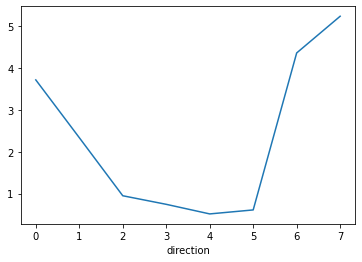

In [23]:
plt.plot(mean)
plt.xlabel('direction')
plt.show

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_norm = scaler.fit_transform(fr)

pca = PCA(n_components=2)
pdata = pca.fit_transform(data_norm)

print(pca.explained_variance_)

[24.44269035  8.37567532]


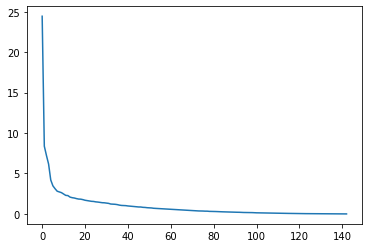

In [25]:
scaler = StandardScaler()
data_norm = scaler.fit_transform(fr)

pca = PCA(n_components=143)
pdata = pca.fit_transform(data_norm)

plt.plot(pca.explained_variance_)

### Day 2

In [26]:
def tuning_function(x, mu, kappa, fmax, bsl):
    # Von Mises, with kappa the concentration, mu the location
    # fmax the firing rate at pref ori, bsl the min firing rate (not the baseline, which was substracted) 
    tf = bsl + np.exp(kappa*np.cos((x-mu))) * fmax
    return tf

from lmfit import Model
from lmfit import Parameters


def fit_tc(array, init_kappa):
    x = np.linspace(0, 2*np.pi, len(array))
    y = array

    mod = Model(tuning_function)
    pars = Parameters()
    pars.add_many(('mu', x[np.argmax(y)], True, 0., 2* np.pi),
                  ('kappa', init_kappa, True,  .1, 60.),
                  ('fmax', np.max(array), True, 0.01, np.max(array)),
                 ('bsl', np.min(array), True, 0.0, np.max(array) + 5))
    out = mod.fit(y, pars, x=x, nan_policy='omit', max_nfev = 5000)

    return out.best_values



#### Neuron 1

<function matplotlib.pyplot.show(close=None, block=None)>

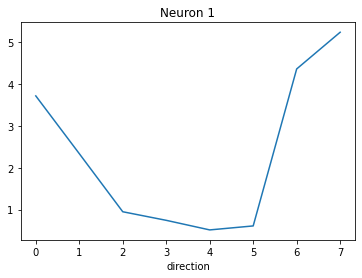

In [27]:
plt.plot(mean)
plt.xlabel('direction')
plt.title('Neuron 1')
plt.show

In [28]:
params = fit_tc(mean, 1)
params

{'mu': 3.3273438073670256,
 'kappa': 0.556761477925219,
 'fmax': 1.0300971296962123,
 'bsl': 1.2813358038697336}

In [29]:
params['mu']

3.3273438073670256

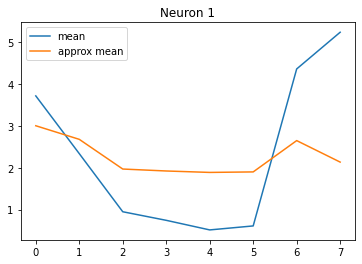

In [30]:
params = fit_tc(mean, 1)

approx_mean = tuning_function(mean, params['mu'], params['kappa'], params['fmax'], params['bsl'])
plt.plot(mean, label='mean')
plt.plot(approx_mean, label='approx mean')
plt.legend()
plt.title('Neuron 1')

plt.show()

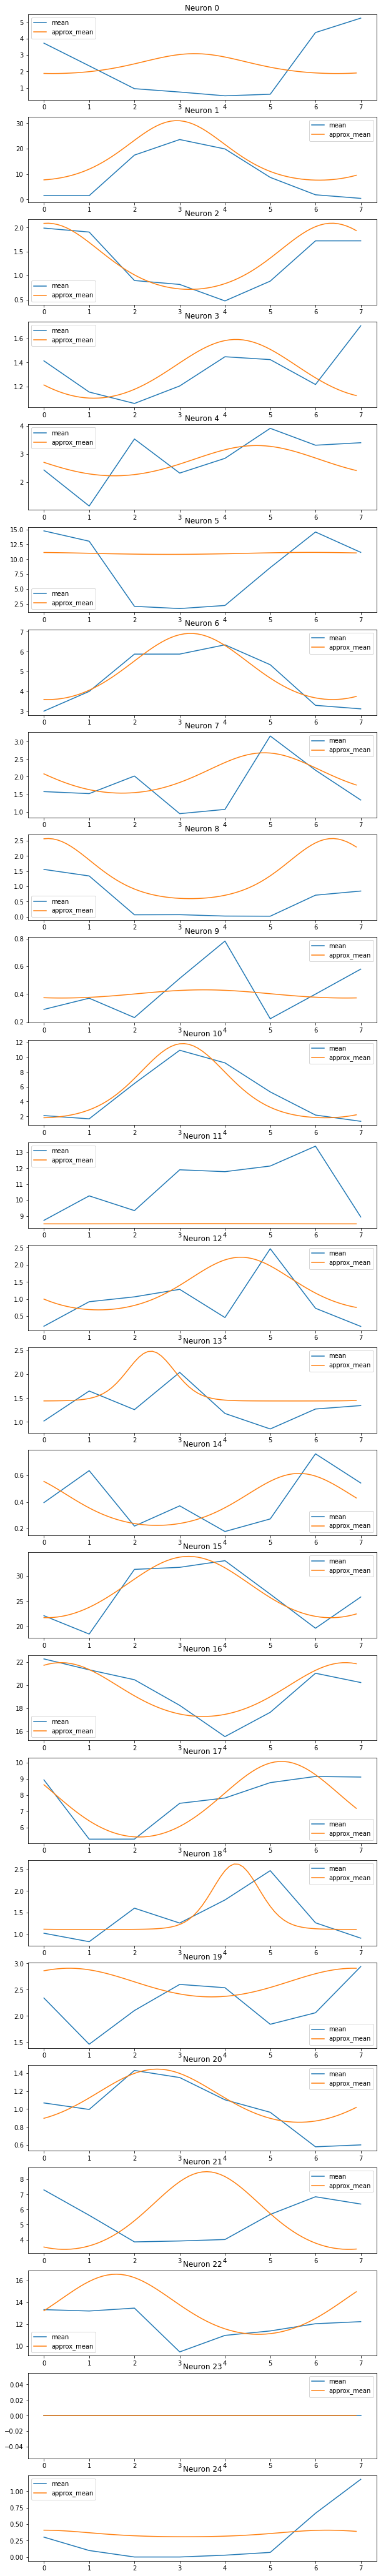

In [31]:
nb_neurons = DATA['R'].shape[0]
nb_trials = DATA['R'].shape[1]

f, axes = plt.subplots(25, 1, figsize=(10, 25*3))

for neuron in range (0, 25):
        mean = np.zeros(8)
        for i in range(1,9):
            mean[i-1] = fr[(DATA['direction'][:,0]== i)[:]== True,neuron].mean()
        params = fit_tc(mean, 1)

        approx_mean = tuning_function(np.arange(0,7,0.1), params['mu'], params['kappa'], params['fmax'], params['bsl'])
        axes[neuron].plot(mean, label='mean')
        axes[neuron].plot(np.arange(0,7,0.1), approx_mean, label='approx_mean')
        axes[neuron].title.set_text(f'Neuron {neuron}')
        axes[neuron].legend()

plt.show()

#### Histogramme mu et kappa

C:\Users\jpeis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


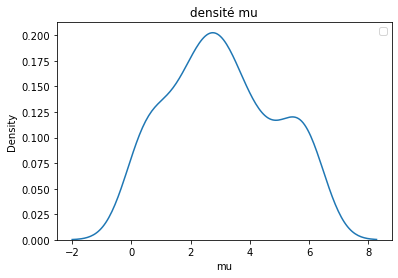

In [32]:
import seaborn as sns

mu = np.zeros(nb_neurons)

for neuron in range(nb_neurons):
    mean = np.zeros(8)
    for i in range(1,9):
        mean[i-1] = fr[(DATA['direction'][:,0]== i)[:]== True,neuron].mean()
    params = fit_tc(mean, 1)
    mu[neuron] = params['mu']

sns.distplot(mu, hist=False)
plt.title('densité mu')
plt.xlabel('mu')
plt.legend()
plt.show()

(array([16., 12., 10., 18., 21., 20., 11.,  7., 12., 16.]),
 array([0.        , 0.62831707, 1.25663415, 1.88495122, 2.51326829,
        3.14158536, 3.76990244, 4.39821951, 5.02653658, 5.65485365,
        6.28317073]),
 <BarContainer object of 10 artists>)

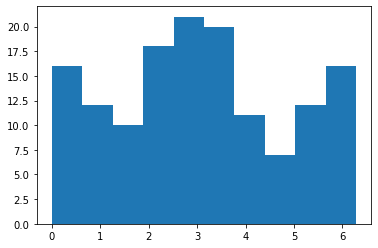

In [33]:
plt.hist(mu)

### Day 3

#### PCA

##### PCA applied with the matrix nb_trials * nb_neurons

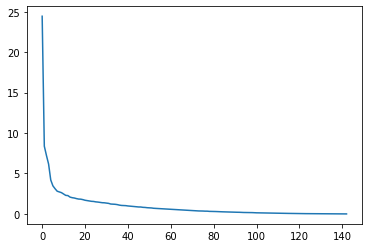

In [34]:
# fr : matrice nb_trials * nb_neurons

scaler = StandardScaler()
data_norm = scaler.fit_transform(fr)

pca = PCA(n_components=143)
pdata = pca.fit_transform(data_norm)

plt.plot(pca.explained_variance_)

In [35]:
data_norm.shape

(158, 143)

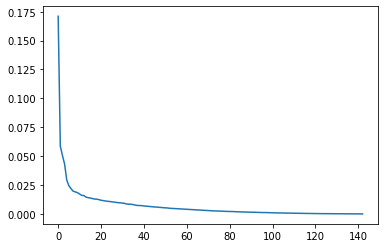

In [36]:
plt.plot(pca.explained_variance_ratio_)

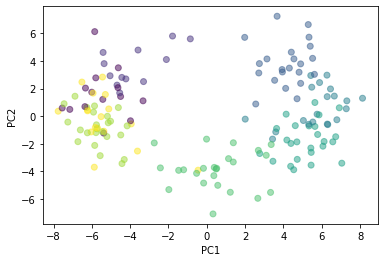

In [37]:
plt.scatter(pdata[:,0], pdata[:,1],c=DATA['direction'], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

##### PCA applied with the matrix directions * neurons

In [38]:
mean = np.zeros((8, nb_neurons))
for neuron in range(nb_neurons):
    for i in range(1,9):
        mean[i-1, neuron] = fr[(DATA['direction'][:,0]== i)[:]== True,neuron].mean()

In [39]:
mean.shape

(8, 143)

In [40]:
scaler = StandardScaler()
data_norm2 = scaler.fit_transform(mean)

pca2 = PCA(n_components=8)
pdata2 = pca2.fit_transform(data_norm2)

new_pdata = pca2.transform(data_norm) # j'obtiens pour chaque point (correspondant à un essai d'un neurone donné)
                                      # ses coordonnées sur les axes de la PCA appliquée avec la matrice dir * nb_neurons


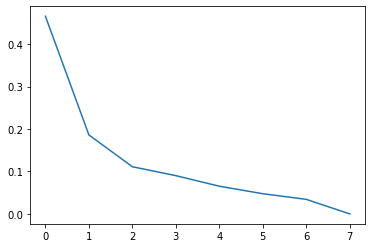

In [41]:
plt.plot(pca2.explained_variance_ratio_)

In [42]:
new_pdata.shape

(158, 8)

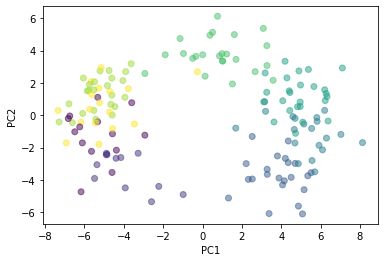

In [43]:
plt.scatter(new_pdata[:,0], new_pdata[:,1],c=DATA['direction'], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

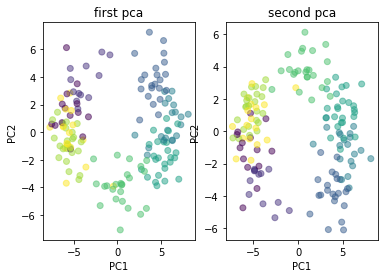

In [44]:
f, ax = plt.subplots(1, 2)
ax[1].scatter(new_pdata[:,0], new_pdata[:,1],c=DATA['direction'], alpha=0.5)
ax[1].axes.set_xlabel('PC1')
ax[1].axes.set_ylabel('PC2')
ax[1].title.set_text('second pca')

ax[0].scatter(pdata[:,0], pdata[:,1],c=DATA['direction'], alpha=0.5)
ax[0].axes.set_xlabel('PC1')
ax[0].axes.set_ylabel('PC2')
ax[0].title.set_text('first pca')

### Day 4

#### Decoding: Discrete Classification

##### Classification using Poisson Distribution

In [45]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [46]:
clf = linear_model.PoissonRegressor()

fr = DATA['R'].transpose()

scaler = StandardScaler()
data_norm = scaler.fit_transform(fr)

X = data_norm
y = DATA['direction'].squeeze()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

clf = linear_model.PoissonRegressor()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.4067980826226584

##### Logistic Regresion

In [47]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

clf.score(X_test, y_test)

0.6875

##### Avec Pytorch